## Leemos el dataset una vez limpiado, el mismo que se esta usando para el proyecto final

In [32]:
import pandas as pd

data = pd.read_csv('./Datasets/Data_Combinada.csv')

# Mostrar las primeras filas del dataframe para inspeccionar la estructura y los campos
data.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7264\1202882644.py:3: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./Datasets/Data_Combinada.csv')


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,numero_pasajeros,fugado
0,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,...,De 30 a 34 años,M,NaN,NaN,"443359,226","4472082,272",0.0,0.0,2,No
1,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,...,De 45 a 49 años,H,NaN,NaN,"443359,226","4472082,272",0.0,0.0,2,No
2,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,...,De 30 a 34 años,H,NaN,NaN,"441155,351","4474129,588",1.0,0.0,3,No
3,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,...,De 35 a 39 años,M,NaN,NaN,"441155,351","4474129,588",0.0,0.0,3,No
4,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Turismo,...,De 40 a 44 años,H,NaN,NaN,"441155,351","4474129,588",0.0,0.0,3,No


## Division entre Norte y sur
Voy a considerar los siguientes distritos como parte del norte de Madrid:

- Tetuán
- Chamartín
- Fuencarral-El Pardo
- Moncloa-Aravaca
- Hortaleza

Los distritos del sur de Madrid pueden considerarse:

- Puente de Vallecas
- Usera
- Moratalaz
- Villaverde
- Villa de Vallecas
- Vicálvaro

Ahora, se agruparán los datos según estas categorías y calcularé la desviación estándar para el número de ocurrencias de accidentes en cada distrito. Esto implicará contar el número de filas (ocurrencias de accidentes) por cada distrito y luego calcularemos la desviación estándar para cada zona.

In [33]:
# Crear listas de distritos para las zonas norte y sur
distritos_norte = ['TETUAN', 'CHAMARTIN', 'FUENCARRAL-EL PARDO', 'MONCLOA-ARAVACA', 'HORTALEZA','EL PARDO', 'FUENTELARREINA', 'PEÑAGRANDE', 'PILAR', 'LA PAZ', 'VALVERDE', 'MIRASIERRA']
distritos_sur = ['PUENTE DE VALLECAS', 'USERA', 'MORATALAZ', 'VILLAVERDE', 'VILLA DE VALLECAS', 'VICALVARO', 'CARABANCHEL', 'LATINA', 'SAN BLAS-CANILLEJAS']

# Filtrar datos
data_norte = data[data['distrito'].isin(distritos_norte)]
data_sur = data[data['distrito'].isin(distritos_sur)]

# Contar ocurrencias de accidentes por distrito
accidentes_norte = data_norte['distrito'].value_counts()
accidentes_sur = data_sur['distrito'].value_counts()

# Calcular la desviación estándar para cada zona
std_norte = accidentes_norte.std()
std_sur = accidentes_sur.std()

# Calcular la media de accidentes para cada distrito en cada zona
media_accidentes_norte = accidentes_norte.mean()
media_accidentes_sur = accidentes_sur.mean()

accidentes_norte, accidentes_sur

(FUENCARRAL-EL PARDO    4074
 MONCLOA-ARAVACA        3933
 HORTALEZA              2829
 Name: distrito, dtype: int64,
 PUENTE DE VALLECAS     5879
 CARABANCHEL            4761
 SAN BLAS-CANILLEJAS    3891
 LATINA                 3566
 USERA                  3237
 VILLAVERDE             2543
 VILLA DE VALLECAS      2064
 MORATALAZ              1967
 Name: distrito, dtype: int64)

In [34]:
print('Desviacion estandár de la zona Norte de madrid: ',std_norte)
print('Desviacion estandár de la zona Sur de madrid: ',std_sur)

Desviacion estandár de la zona Norte de madrid:  681.7528877826628
Desviacion estandár de la zona Sur de madrid:  1352.4128701800244


- La desviación estándar más baja en la Zona Norte (681.75) sugiere que los accidentes en esta zona están más agrupados alrededor de su media. Esto podría indicar una mayor uniformidad en la cantidad de accidentes en los distintos distritos de la Zona Norte.
- Por otro lado, la desviación estándar significativamente más alta en la Zona Sur (1,352.41) indica una mayor variabilidad en el número de accidentes. Esto significa que hay distritos dentro de la Zona Sur donde la cantidad de accidentes difiere más marcadamente de la media, lo que sugiere una distribución de accidentes menos uniforme en esta zona.
- La mayor dispersión en la Zona Sur podría deberse a una variedad de factores, como diferencias en la infraestructura vial, la densidad de tráfico, o la distribución de zonas residenciales y comerciales/industriales.

In [35]:
print('Media de accidentes por distrito de la zona Norte de madrid: ',media_accidentes_norte)
print('Media de accidentes por distrito de la zona Sur de madrid: ',media_accidentes_sur)

Media de accidentes por distrito de la zona Norte de madrid:  3612.0
Media de accidentes por distrito de la zona Sur de madrid:  3488.5


## Gráfica para visualizar la distribución de accidentes por distrito en cada zona

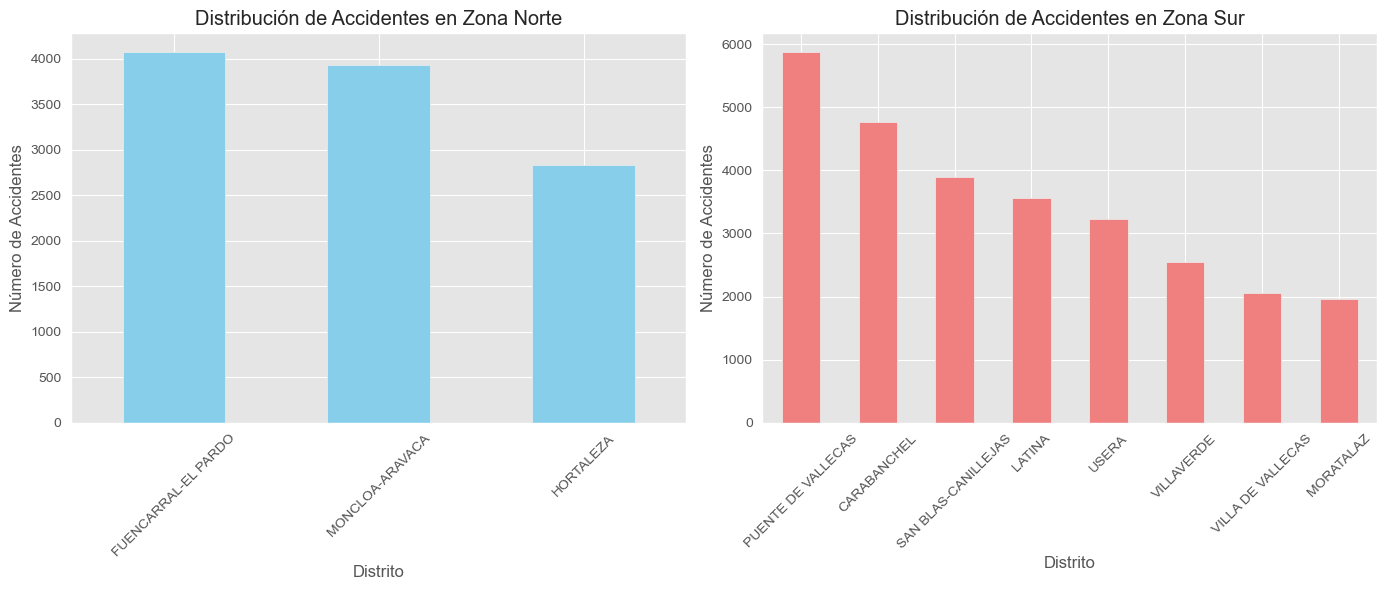

In [36]:
import matplotlib.pyplot as plt

# Gráfica para visualizar la distribución de accidentes por distrito en cada zona
plt.figure(figsize=(14, 6))

# Zona Norte
plt.subplot(1, 2, 1)
accidentes_norte.plot(kind='bar', color='skyblue')
plt.title('Distribución de Accidentes en Zona Norte')
plt.xlabel('Distrito')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)

# Zona Sur
plt.subplot(1, 2, 2)
accidentes_sur.plot(kind='bar', color='lightcoral')
plt.title('Distribución de Accidentes en Zona Sur')
plt.xlabel('Distrito')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Podemos observar que en la Zona Norte, los distritos de Fuencarral-El Pardo, Moncloa-Aravaca y Hortaleza presentan distintos niveles de accidentes, con Fuencarral-El Pardo teniendo el mayor número.
En la Zona Sur, Puente de Vallecas tiene notablemente más accidentes en comparación con otros distritos como Usera, Villaverde, Villa de Vallecas y Moratalaz.

## Separación entre Norte y Sur

Sumamos las Ocurrencias de los accidentes en las 2 zonas como una union entre los accidentes hacia la zona norte de madrid y otra hacia la zona sur de madrid, creamos un dataframe para las zonas y el numero de accidentes en cada zona, para por ultimo calcular la desviacion estandar entre la zona Norte y la Zona sur

In [37]:
total_accidentes_norte = accidentes_norte.sum()
total_accidentes_sur = accidentes_sur.sum()

# Crear un DataFrame para representar el total de accidentes por zona
df_accidentes_zona = pd.DataFrame({
    'Zona': ['Norte', 'Sur'],
    'Total Accidentes': [total_accidentes_norte, total_accidentes_sur]
})

# Calcular la desviación estándar para el total de accidentes en las dos zonas
std_total = df_accidentes_zona['Total Accidentes'].std()

df_accidentes_zona, std_total

(    Zona  Total Accidentes
 0  Norte             10836
 1    Sur             27908,
 12071.726968416739)

La desviación estándar entre el total de accidentes en la Zona Norte y la Zona Sur es de 12071.72. Esto indica una diferencia considerable en el número de accidentes entre las dos zonas, con la Zona Sur teniendo una cantidad significativamente mayor de accidentes en comparación con la Zona Norte. Esta información puede ser útil para la planificación de medidas de seguridad y prevención de accidentes, centrándose en las áreas donde ocurren más frecuentemente.

## Gráfica para visualizar la comparación entre las zonas Norte y Sur

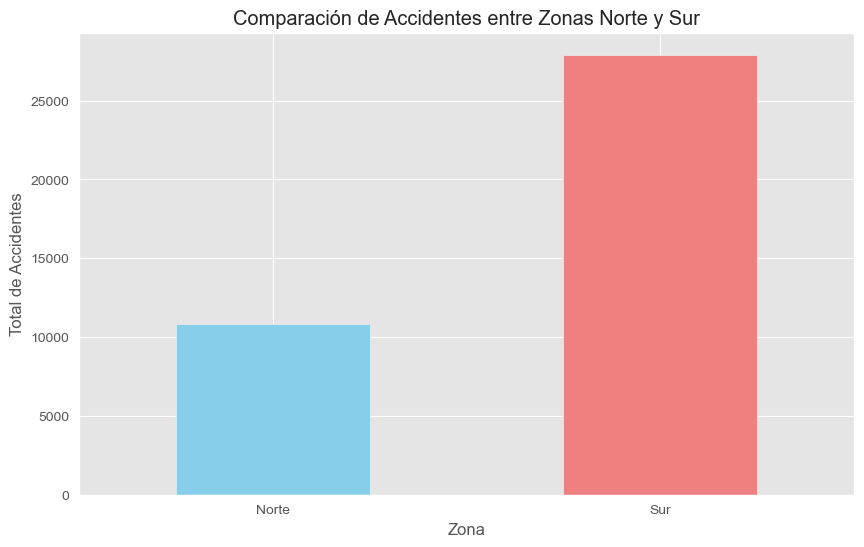

In [38]:
plt.figure(figsize=(10, 6))
df_accidentes_zona.set_index('Zona')['Total Accidentes'].plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Comparación de Accidentes entre Zonas Norte y Sur')
plt.xlabel('Zona')
plt.ylabel('Total de Accidentes')
plt.xticks(rotation=0)
plt.show()

Esta gráfica muestra claramente que la Zona Sur tiene un mayor total de accidentes en comparación con la Zona Norte, lo que coincide con la desviación estándar calculada previamente.

La diferencia notable en el total de accidentes entre las zonas Norte y Sur de Madrid, como se observa en la gráfica, puede deberse a varios factores urbanos, socioeconómicos y de infraestructura. Algunas posibles explicaciones incluyen:

1. Densidad de Población y Tráfico:
- La Zona Sur podría tener una densidad de población más alta o vías más congestionadas, lo que aumenta la probabilidad de accidentes. Más gente y vehículos en las calles generalmente se traducen en más incidentes.

2. Condiciones de Infraestructura Vial:
- La calidad de las carreteras, la señalización y los cruces peatonales pueden variar significativamente entre las dos zonas. Si la Zona Sur tiene infraestructuras viales en peores condiciones o menos medidas de seguridad vial, esto podría contribuir al mayor número de accidentes.

3. Distribución de Zonas Industriales y Comerciales:
- Si la Zona Sur contiene más zonas industriales o comerciales, el tráfico pesado y el movimiento constante de mercancías pueden aumentar el riesgo de accidentes.

4. Factores Socioeconómicos:
- Diferencias en los niveles socioeconómicos entre las zonas pueden influir en la cantidad y el estado de los vehículos en la carretera, así como en la educación vial y la adherencia a las leyes de tráfico.

5. Accesibilidad y Cobertura del Transporte Público:
- Una cobertura insuficiente o una baja calidad del transporte público en la Zona Sur podrían llevar a un mayor uso del vehículo privado, aumentando así el riesgo de accidentes.

6. Comportamiento de los Conductores y Peatones:
- Factores culturales o de comportamiento, como el respeto a las normas de tráfico, la incidencia de conducción bajo efectos del alcohol o drogas, o la distracción por dispositivos móviles, pueden variar entre zonas y afectar las tasas de accidentes.

## Comparamos visualmente cada distrito con su media

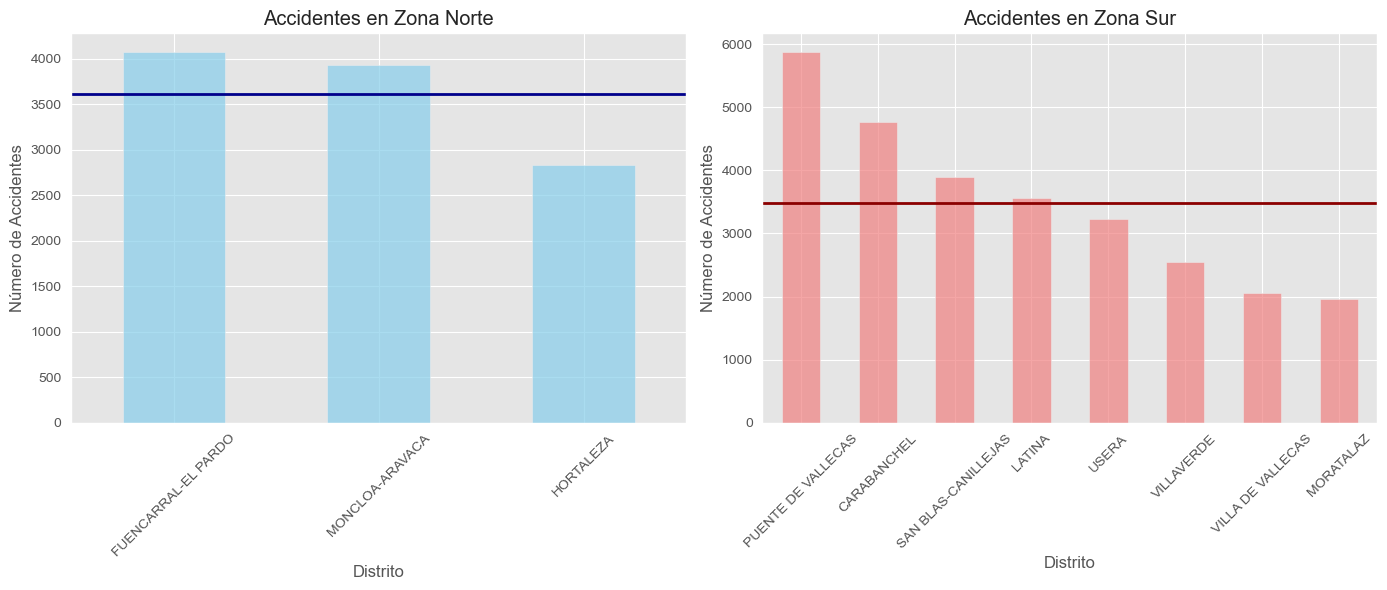

In [39]:
plt.style.use('ggplot')

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 6))

# Gráfico para la Zona Norte
plt.subplot(1, 2, 1)
accidentes_norte.plot(kind='bar', color='skyblue', alpha=0.7)
plt.axhline(y=media_accidentes_norte, color='darkblue', linestyle='-', linewidth=2)
plt.title('Accidentes en Zona Norte')
plt.xlabel('Distrito')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)

# Gráfico para la Zona Sur
plt.subplot(1, 2, 2)
accidentes_sur.plot(kind='bar', color='lightcoral', alpha=0.7)
plt.axhline(y=media_accidentes_sur, color='darkred', linestyle='-', linewidth=2)
plt.title('Accidentes en Zona Sur')
plt.xlabel('Distrito')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Zona Norte:
- Los accidentes en cada distrito se comparan con la media (línea azul sólida).
- La mayoría de los distritos tienen un número de accidentes cercano a la media, lo que indica una distribución relativamente uniforme de los accidentes en la Zona Norte.
### Zona Sur:
- De manera similar, los accidentes en cada distrito se comparan con la media (línea roja sólida).
- La variabilidad en el número de accidentes es más pronunciada en la Zona Sur, con algunos distritos teniendo un número de accidentes notablemente mayor o menor que la media.

Crearé un gráfico que compare el número de accidentes por distrito con la distribución normal estándar, necesitaría calcular el z-score de cada distrito. El z-score indica cuántas desviaciones estándar un punto de dato está de la media.

Representará una distribución normal estándar y sus correspondientes porcentajes dentro de 1, 2 y 3 desviaciones estándar de la media. Para los accidentes por distrito, comparemos datos reales con una distribución normal estándar.

Procederé a calcular los z-scores para cada distrito en las zonas Norte y Sur y crear un gráfico que represente esta comparación.

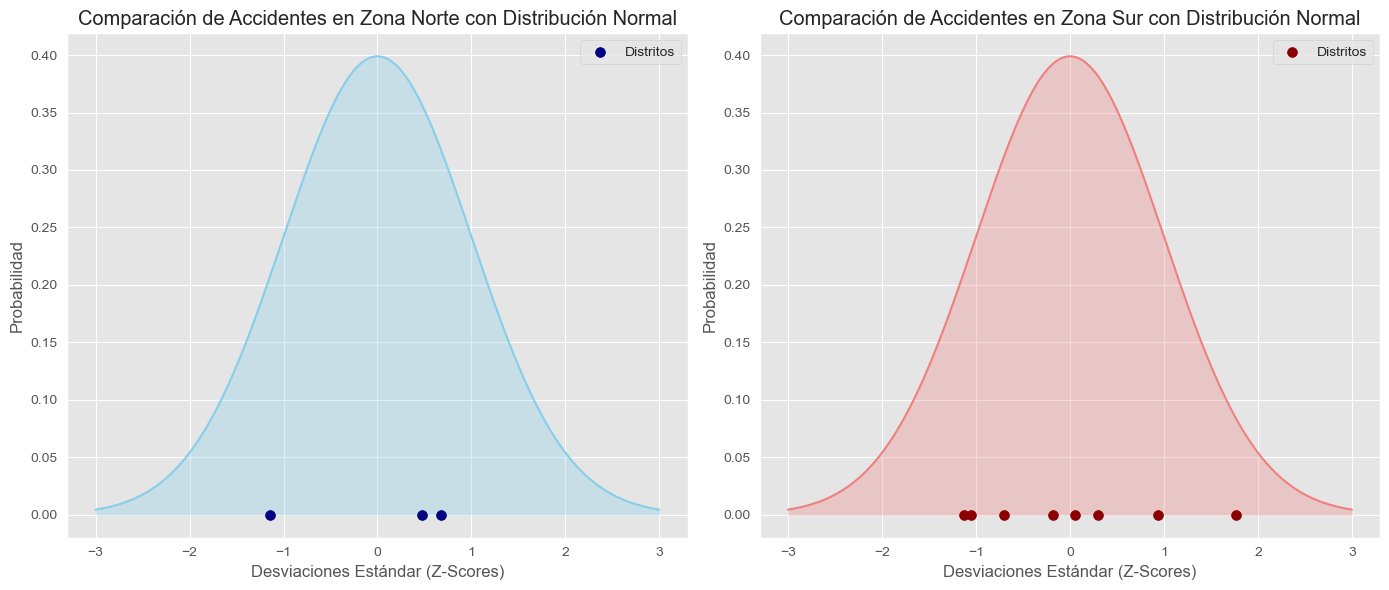

In [40]:
import numpy as np
import scipy.stats as stats

# Calcular z-scores para los distritos de la Zona Norte y Sur
z_scores_norte = (accidentes_norte - media_accidentes_norte) / std_norte
z_scores_sur = (accidentes_sur - media_accidentes_sur) / std_sur

# Crear un rango para la distribución normal estándar
x = np.arange(-3, 3, 0.001)
y = stats.norm.pdf(x, 0, 1)

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 6))

# Gráfico para la Zona Norte
plt.subplot(1, 2, 1)
plt.plot(x, y, color='skyblue')
plt.fill_between(x, y, alpha=0.3, color='skyblue')
plt.scatter(z_scores_norte, np.zeros(z_scores_norte.shape), color='navy', s=50, label='Distritos')
plt.title('Comparación de Accidentes en Zona Norte con Distribución Normal')
plt.xlabel('Desviaciones Estándar (Z-Scores)')
plt.ylabel('Probabilidad')
plt.legend()

# Gráfico para la Zona Sur
plt.subplot(1, 2, 2)
plt.plot(x, y, color='lightcoral')
plt.fill_between(x, y, alpha=0.3, color='lightcoral')
plt.scatter(z_scores_sur, np.zeros(z_scores_sur.shape), color='darkred', s=50, label='Distritos')
plt.title('Comparación de Accidentes en Zona Sur con Distribución Normal')
plt.xlabel('Desviaciones Estándar (Z-Scores)')
plt.ylabel('Probabilidad')
plt.legend()

plt.tight_layout()
plt.show()

#### Zona Norte (izquierda):
 Los marcadores indican la posición de cada distrito en términos de su z-score, que es el número de desviaciones estándar que están por encima o por debajo de la media. La curva representa la distribución normal estándar.

#### Zona Sur (derecha):
Al igual que en la Zona Norte, los marcadores representan los z-scores de los distritos. La curva muestra la distribución normal estándar.

Los gráficos muestran que los datos de accidentes no siguen una distribución normal perfecta, lo que es común en datos reales. Los z-scores ayudan a entender cómo se distribuyen los accidentes en relación con la media de cada zona.